<a href="https://colab.research.google.com/github/SumitMohan/Covid-19-Third-Wave-Prediction/blob/main/Covid_3rd_Wave_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#we can install TextBlob 
!pip install textblob

In [ ]:
#for cleaning the responses
!pip install Texthero

In [ ]:
#importing TextBlob
import textblob
from textblob import TextBlob

In [ ]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
#Texthero for data cleaning
import texthero as hero
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading the T Dataset
data= pd.read_csv('/content/drive/MyDrive/News.csv')

In [ ]:
data.head()

,Text
0,"Amid speculations of Covid s 3rd wave, expert..."
1,The wave or cycle is of academic significance...
2,"Reacting to this, joint secretary of the Union..."
3,There have been several projections and opinio...
4,of the third wave will not be like that of the...


In [ ]:
#we need only Text Data
df= data[['Text']]
df.head(5)

,Text
0,"Amid speculations of Covid s 3rd wave, expert..."
1,The wave or cycle is of academic significance...
2,"Reacting to this, joint secretary of the Union..."
3,There have been several projections and opinio...
4,of the third wave will not be like that of the...


In [ ]:
df['CleanData']=hero.clean(df['Text'])

df.head(10)

,Text,CleanData
0,"Amid speculations of Covid s 3rd wave, expert...",amid speculations covid 3rd wave experts said ...
1,The wave or cycle is of academic significance...,wave cycle academic significance cases rising ...
2,"Reacting to this, joint secretary of the Union...",reacting joint secretary union health ministry...
3,There have been several projections and opinio...,several projections opinions regarding third w...
4,of the third wave will not be like that of the...,third wave like second wave blunted wave compa...
5,The impact of the wave will not be the same ac...,impact wave across country vaccination coverag...
6,-- triggered by scientific projections and the...,triggered scientific projections sudden increa...
7,it will be difficult to predict the number of ...,difficult predict number cases dr kang said ma...
8,We know that this is a virus that is dependent...,know virus dependent environment think seeing ...
9,Dr Kang said. Variant and third wave If the ne...,dr kang said variant third wave new wave drive...


In [ ]:
polarity_score = [] #Creating Empty List

In [ ]:
for i in range(0,df.shape[0] ): #first record to lst record
    score = TextBlob(df.iloc[i][1]) #selecting second column TextBlob Data
    score1 = score.sentiment[0] #getting the sentiment score
    polarity_score.append(score1) #adding each tweets polarity score into list

In [ ]:
df = pd.concat([df, pd.Series(polarity_score)]  , axis =1 )
#dding polarity score into original dataframe
df.head(5)

,Text,CleanData,0
0,"Amid speculations of Covid s 3rd wave, expert...",amid speculations covid 3rd wave experts said ...,-0.001389
1,The wave or cycle is of academic significance...,wave cycle academic significance cases rising ...,0.000000
2,"Reacting to this, joint secretary of the Union...",reacting joint secretary union health ministry...,0.068182
3,There have been several projections and opinio...,several projections opinions regarding third w...,0.000000
4,of the third wave will not be like that of the...,third wave like second wave blunted wave compa...,-0.071364


In [ ]:
#Renaming added column
df.rename(columns={df.columns[2]  :"Textblob_Sentiment"}, inplace = True ) 
df

,Text,CleanData,Textblob_Sentiment
0,"Amid speculations of Covid s 3rd wave, expert...",amid speculations covid 3rd wave experts said ...,-0.001389
1,The wave or cycle is of academic significance...,wave cycle academic significance cases rising ...,0.000000
2,"Reacting to this, joint secretary of the Union...",reacting joint secretary union health ministry...,0.068182
3,There have been several projections and opinio...,several projections opinions regarding third w...,0.000000
4,of the third wave will not be like that of the...,third wave like second wave blunted wave compa...,-0.071364
...,...,...,...
201,stated a study led by Manindra Agrawal and Mat...,stated study led manindra agrawal mathukumalli...,0.000000
202,"As per media reports, Mathukumalli Vidyasagar ...",per media reports mathukumalli vidyasagar stat...,0.080000
203,these researchers in May 2021 had accurately f...,researchers may accurately forecasted india co...,-0.012500
204,India will have to expand its vaccination cove...,india expand vaccination coverage detect emerg...,0.068182


In [ ]:
#getting number of Positive Sentiments
len(df[df.Textblob_Sentiment > 0])

135

In [ ]:
#getting number of Negative Sentiments
len(df[df.Textblob_Sentiment <0])

52

In [ ]:
#Total No. of Tweets
df.shape

(206, 3)

In [ ]:
#getting the Neutral Sentiments
len(df[df.Textblob_Sentiment ==0])

19

In [ ]:
#creating wordcloud 
from wordcloud import WordCloud  
WordCloud
from  nltk.corpus import stopwords #for stopwords 

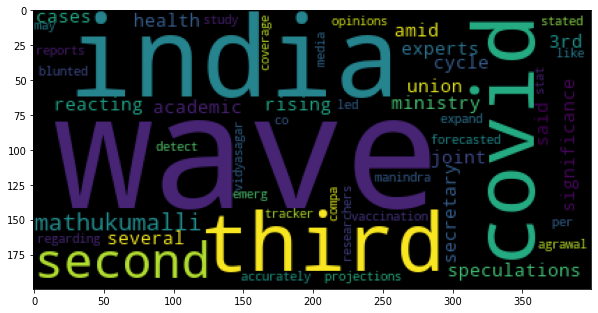

In [ ]:
cloud  = WordCloud(max_words= 50, stopwords=stopwords.words("english") ).generate(str(df['CleanData']) )
plt.figure(figsize= (10 , 10)) 
plt.imshow(cloud)

In [ ]:
positive_tweet=  df[df.Textblob_Sentiment >0]
positive_tweet.shape

(135, 3)

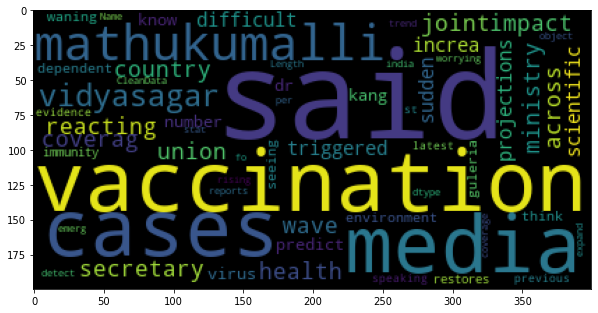

In [ ]:
cloud  = WordCloud(max_words= 80, stopwords=stopwords.words("english") ).generate(str(positive_tweet['CleanData']) )
plt.figure(figsize= (10 , 10)) 
plt.imshow(cloud)

In [ ]:
negative_tweet=  df[df.Textblob_Sentiment <0]
negative_tweet.shape

(52, 3)

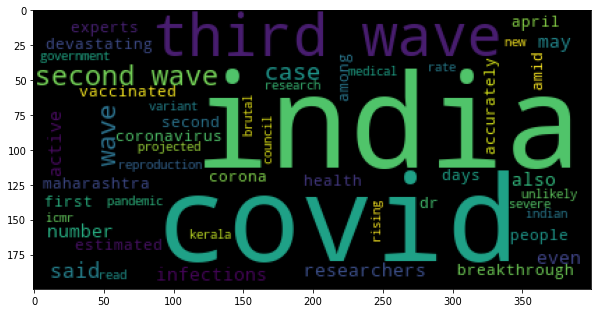

In [ ]:
cloud  = WordCloud(max_words= 50, stopwords=stopwords.words("english") ).generate(str(negative_tweet['CleanData']) )
plt.figure(figsize= (10 , 10)) 
plt.imshow(cloud)

In [ ]:
neutral_tweet=  df[df.Textblob_Sentiment ==0]
neutral_tweet.shape

(19, 3)

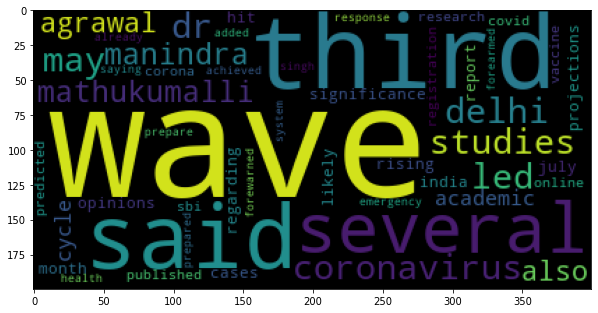

In [ ]:
cloud  = WordCloud(max_words= 50, stopwords=stopwords.words("english") ).generate(str(neutral_tweet['CleanData']) )
plt.figure(figsize= (10 , 10)) 
plt.imshow(cloud)

Sentiment analysis by stanza


In [ ]:
!pip install stanza
!pip install pycorenlp
# Stanza
import stanza
stanza.download('en')



2021-09-03 17:53:12 INFO: Downloading default packages for language: en (English)...
2021-09-03 17:53:14 INFO: File exists: /root/stanza_resources/en/default.zip.
2021-09-03 17:53:19 INFO: Finished downloading models and saved to /root/stanza_resources.


In [ ]:
import stanza

nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment')

2021-09-03 17:53:19 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

2021-09-03 17:53:19 INFO: Use device: cpu
2021-09-03 17:53:19 INFO: Loading: tokenize
2021-09-03 17:53:19 INFO: Loading: sentiment
2021-09-03 17:53:20 INFO: Done loading processors!


In [ ]:
# Stanford CoreNLP
from pycorenlp import StanfordCoreNLP

In [ ]:
tweet=df
tweet

,Text,CleanData,Textblob_Sentiment
0,"Amid speculations of Covid s 3rd wave, expert...",amid speculations covid 3rd wave experts said ...,-0.001389
1,The wave or cycle is of academic significance...,wave cycle academic significance cases rising ...,0.000000
2,"Reacting to this, joint secretary of the Union...",reacting joint secretary union health ministry...,0.068182
3,There have been several projections and opinio...,several projections opinions regarding third w...,0.000000
4,of the third wave will not be like that of the...,third wave like second wave blunted wave compa...,-0.071364
...,...,...,...
201,stated a study led by Manindra Agrawal and Mat...,stated study led manindra agrawal mathukumalli...,0.000000
202,"As per media reports, Mathukumalli Vidyasagar ...",per media reports mathukumalli vidyasagar stat...,0.080000
203,these researchers in May 2021 had accurately f...,researchers may accurately forecasted india co...,-0.012500
204,India will have to expand its vaccination cove...,india expand vaccination coverage detect emerg...,0.068182


In [ ]:

tweet=df
tweet.head(2)

,Text,CleanData,Textblob_Sentiment
0,"Amid speculations of Covid s 3rd wave, expert...",amid speculations covid 3rd wave experts said ...,-0.001389
1,The wave or cycle is of academic significance...,wave cycle academic significance cases rising ...,0.000000


In [ ]:
tweet['CleanData']

0      amid speculations covid 3rd wave experts said ...
1      wave cycle academic significance cases rising ...
2      reacting joint secretary union health ministry...
3      several projections opinions regarding third w...
4      third wave like second wave blunted wave compa...
                             ...                        
201    stated study led manindra agrawal mathukumalli...
202    per media reports mathukumalli vidyasagar stat...
203    researchers may accurately forecasted india co...
204    india expand vaccination coverage detect emerg...
205    india covid tracker india overcame second wave...
Name: CleanData, Length: 206, dtype: object

In [ ]:
# Obtain (average) sentiment score generated by Stanza for each Tweet
import numpy as np
def stanza_analyze(Text):
    document = nlp(Text)
    print('Processing')
    return np.mean([(i.sentiment - 1) for i in document.sentences]) 
# Minus 1 so as to bring score range of [0,2] to [-1,1]
  
# Obtain sentiment categorical score generated by Stanza
tweet['stanza_score'] = tweet['CleanData'].apply(lambda x: stanza_analyze(x))
neutral_thresh = 0.05
# Convert average Stanza sentiment score into sentiment categories
tweet['stanza_sentiment'] = tweet['stanza_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

In [ ]:
tweet.head(10)

,Text,CleanData,Textblob_Sentiment,stanza_score,stanza_sentiment
0,"Amid speculations of Covid s 3rd wave, expert...",amid speculations covid 3rd wave experts said ...,-0.001389,-1.0,Negative
1,The wave or cycle is of academic significance...,wave cycle academic significance cases rising ...,0.000000,0.0,Neutral
2,"Reacting to this, joint secretary of the Union...",reacting joint secretary union health ministry...,0.068182,0.0,Neutral
3,There have been several projections and opinio...,several projections opinions regarding third w...,0.000000,0.0,Neutral
4,of the third wave will not be like that of the...,third wave like second wave blunted wave compa...,-0.071364,-1.0,Negative
5,The impact of the wave will not be the same ac...,impact wave across country vaccination coverag...,0.072727,1.0,Positive
6,-- triggered by scientific projections and the...,triggered scientific projections sudden increa...,0.112121,0.0,Neutral
7,it will be difficult to predict the number of ...,difficult predict number cases dr kang said ma...,0.039336,-1.0,Negative
8,We know that this is a virus that is dependent...,know virus dependent environment think seeing ...,0.207143,0.0,Neutral
9,Dr Kang said. Variant and third wave If the ne...,dr kang said variant third wave new wave drive...,0.036157,-1.0,Negative


In [ ]:
#getting number of Positive Sentiments
len(tweet[tweet.stanza_sentiment=='Positive'])

28

In [ ]:
#getting number of Negative Sentiments
len(tweet[tweet.stanza_sentiment=='Negative'])

133

In [ ]:
#getting number of Neutral Sentiments
len(tweet[tweet.stanza_sentiment=='Neutral'])

45

Sentiment Analysis through NLTK Vader


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download('vader_lexicon')
sent= SentimentIntensityAnalyzer() #creating an object/ instance

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
clean_text=df
clean_text.head(2)

,Text,CleanData,Textblob_Sentiment,stanza_score,stanza_sentiment
0,"Amid speculations of Covid s 3rd wave, expert...",amid speculations covid 3rd wave experts said ...,-0.001389,-1.0,Negative
1,The wave or cycle is of academic significance...,wave cycle academic significance cases rising ...,0.000000,0.0,Neutral


In [ ]:
clean_text.shape

(206, 5)

In [ ]:
compound_score=[]
positive_score=[]
negative_score=[]
for i in range(0,clean_text.shape[0]):
    score=sent.polarity_scores(clean_text.iloc[i][1]) # this[0 for selecting the Text column
    score1= score['compound'] #getting the compund score
    compound_score.append(score1) #adding into compound score list
    score2= score['pos']
    positive_score.append(score2)
    score3= score['neg']
    negative_score.append(score3)

In [ ]:
#adding the generated score into original dataframe
clean_text['Compond_Score']=  compound_score
clean_text['Positive_Score']= positive_score
clean_text['Negative_Score']= negative_score

In [ ]:
clean_text.head(5)

,Text,CleanData,Textblob_Sentiment,stanza_score,stanza_sentiment,Compond_Score,Positive_Score,Negative_Score
0,"Amid speculations of Covid s 3rd wave, expert...",amid speculations covid 3rd wave experts said ...,-0.001389,-1.0,Negative,0.2500,0.070,0.026
1,The wave or cycle is of academic significance...,wave cycle academic significance cases rising ...,0.000000,0.0,Neutral,0.2960,0.078,0.000
2,"Reacting to this, joint secretary of the Union...",reacting joint secretary union health ministry...,0.068182,0.0,Neutral,0.0000,0.000,0.000
3,There have been several projections and opinio...,several projections opinions regarding third w...,0.000000,0.0,Neutral,0.0000,0.000,0.000
4,of the third wave will not be like that of the...,third wave like second wave blunted wave compa...,-0.071364,-1.0,Negative,-0.4215,0.056,0.096


In [ ]:
#getting number of Positive Sentiments
len(clean_text[clean_text.Compond_Score > 0])

99

In [ ]:
#getting number of Negative Sentiments
len(clean_text[clean_text.Compond_Score < 0])

85

In [ ]:
#getting number of Neutral Sentiments
len(clean_text[clean_text.Compond_Score == 0])

22

**Comparison**

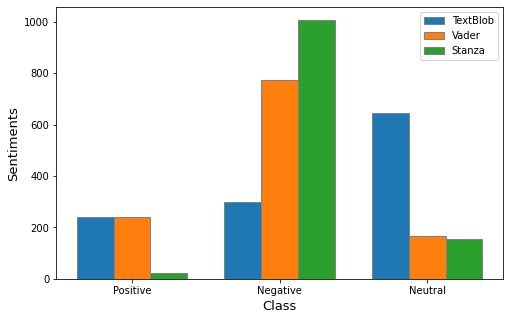

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 5))

# set height of bar
TextBlob = [239, 299, 644]
Vader = [241, 773, 168]
Stanza = [21, 1007, 154]

# Set position of bar on X axis
br1 = np.arange(len(TextBlob))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, TextBlob, width = barWidth,
		edgecolor ='grey', label ='TextBlob')
plt.bar(br2, Vader, width = barWidth,
		edgecolor ='grey', label ='Vader')
plt.bar(br3, Stanza, width = barWidth,
		edgecolor ='grey', label ='Stanza')

# Adding Xticks
plt.xlabel('Class', fontsize = 13)
plt.ylabel('Sentiments', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(TextBlob))],
		['Positive', 'Negative', 'Neutral'])

plt.legend()
plt.show()
